#Grocery Store Project - Association Rule Learninng Implementation

##Importing libraries

In [6]:
!pip install apyori

In [7]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
# from apyori import apriori

##Loading Dataset

In [9]:
df = pd.read_csv('/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [11]:
all_products = df['itemDescription'].unique()
print(f"Total Products : {len(all_products)}")

Total Products : 167


##Top products

In [12]:
x = df["itemDescription"].value_counts()
x = x.sort_values(ascending = False)
x = x[:10]
x

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

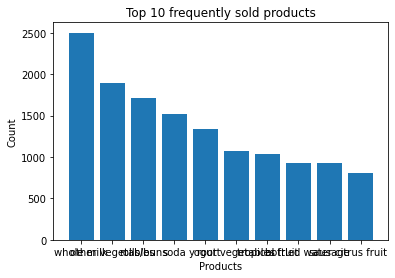

In [13]:
import matplotlib.pyplot as plt

y = dict(x)
x_points = list(y.keys())
y_points = list(y.values())
plt.bar(x_points, y_points)
plt.title("Top 10 frequently sold products")
plt.xlabel('Products')
plt.ylabel('Count')
plt.show()

##One-hot representation of products purchased

In [14]:
one_hot = pd.get_dummies(df['itemDescription'])
df.drop('itemDescription', inplace=True, axis=1)
df = df.join(one_hot)

In [15]:
df.head().describe

<bound method NDFrame.describe of    Member_number        Date  ...  yogurt  zwieback
0           1808  21-07-2015  ...       0         0
1           2552  05-01-2015  ...       0         0
2           2300  19-09-2015  ...       0         0
3           1187  12-12-2015  ...       0         0
4           3037  01-02-2015  ...       0         0

[5 rows x 169 columns]>

##Creating Transactions

In [16]:
records = df.groupby(["Member_number","Date"])[all_products[:]].apply(sum)
records = records.reset_index()[all_products]

In [17]:
def get_Pnames(x):
  for product in all_products:
    if x[product] > 0:
      x[product] = product
  return x

records = records.apply(get_Pnames, axis = 1)
records.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,...,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yogurt,sausage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pastry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,canned beer,0,0,misc. beverages,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sausage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,soda,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
print(f'Total Transactions : {len(records)}')

Total Transactions : 14963


In [19]:
# Removing 0's and converting to list
x = records.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

In [20]:
transactions[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

##Association Rules

In [21]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.0003, min_confidance = 0.05, min_lift = 3, min_length = 2, target = 'rules')

In [22]:
results = list(rules)
results
 

[RelationRecord(items=frozenset({'specialty chocolate', 'frozen fish'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen fish'}), items_add=frozenset({'specialty chocolate'}), confidence=0.049019607843137254, lift=3.0689556157190907), OrderedStatistic(items_base=frozenset({'specialty chocolate'}), items_add=frozenset({'frozen fish'}), confidence=0.02092050209205021, lift=3.0689556157190907)]),
 RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit/vegetable juice'}), items_add=frozenset({'liver loaf'}), confidence=0.011787819253438114, lift=3.52762278978389), OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'ham', 'pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[Orde

#Final Products 
*which should be sold together to make profit*

In [36]:
for i in range(len(results)):
 print(list(results[i][0]))

['specialty chocolate', 'frozen fish']
['fruit/vegetable juice', 'liver loaf']
['ham', 'pickled vegetables']
['roll products ', 'meat']
['salt', 'misc. beverages']
['spread cheese', 'misc. beverages']
['soups', 'seasonal products']
['spread cheese', 'sugar']
['sausage', 'butter', 'bottled beer']
['hard cheese', 'whole milk', 'bottled beer']
['brown bread', 'canned beer', 'frozen vegetables']
['sausage', 'brown bread', 'canned beer']
['soda', 'butter', 'frankfurter']
['yogurt', 'canned beer', 'butter milk']
['sausage', 'canned beer', 'frozen vegetables']
['canned beer', 'hygiene articles', 'whole milk']
['yogurt', 'chewing gum', 'soda']
['yogurt', 'citrus fruit', 'pork']
['rolls/buns', 'coffee', 'frankfurter']
['soda', 'coffee', 'frankfurter']
['pastry', 'sausage', 'coffee']
['fruit/vegetable juice', 'sausage', 'curd']
['sausage', 'margarine', 'curd']
['sausage', 'yogurt', 'curd']
['sausage', 'hard cheese', 'other vegetables']
['rolls/buns', 'pip fruit', 'ice cream']
['shopping bags', '